# PySub Tutorial 4 - Advaned plotting

Welcome to the fourth example case for building! We are going to use the previously determined subsidence model from Tutorial 1 to display the resulting data in various ways which might be common when making figures.

This tutorial can be found in the folder "Tutorials", in the folder where your PySub package has been installed.

The case we are studying is a the result of Tutorial 1, so make sure you have run that code so the model file is saved in the Tutorial 1 folder. The goal is to familiarize you with the PySub model, it's syntax and functionality. 

The PySub modules used in this tutorial are: plot_utils, Geomoetries and memory

In this tutorial we will show you how to:
- Adjust the plots to your liking:
    - Change the colors of the contours
    - Change the title
    - Add a new legend
    - Reuse of the figure for not implemented applications
- Add new data to the model so it can also be plotted with the PySub plot functions
- Adjust how the reservoirs are plotted in the figures
- Add additional shapes to the figure


## The code
In below cells, an example is given of PySub code where the subsidence is loaded.

After this, methods to refine your plots will be discussed.

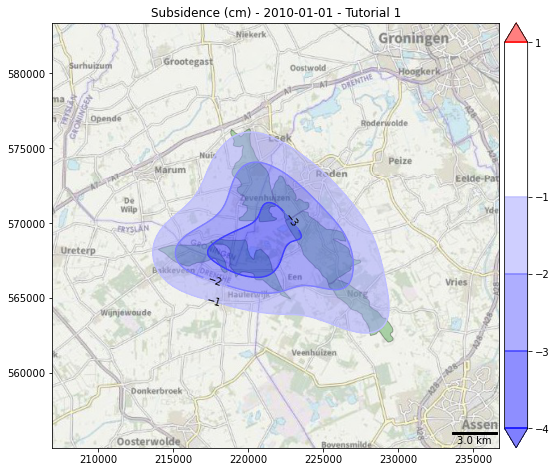

In [3]:
from PySub.memory import load
from PySub import plot_utils as plot
load_file = r'Tutorial 1\save\Tutorial 1.smf'
Model = load(load_file)

plot.plot_subsidence(Model)

## Background layers
The standard background maps chosen in PySub are a Dutch set of topographical maps (OpenTopo). Other maps can be added by finding the link to its wmts service and its layer to the arguments of the plot function. Chances are, that the WMTS function is not in the same coordinate system that your data is in, so specify the coordinate system your data is in.

C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)
C:\Users\davidsb\Anaconda3\envs\PySub\lib\site-packages\owslib\wmts.py:643: RuntimeWarning: Til

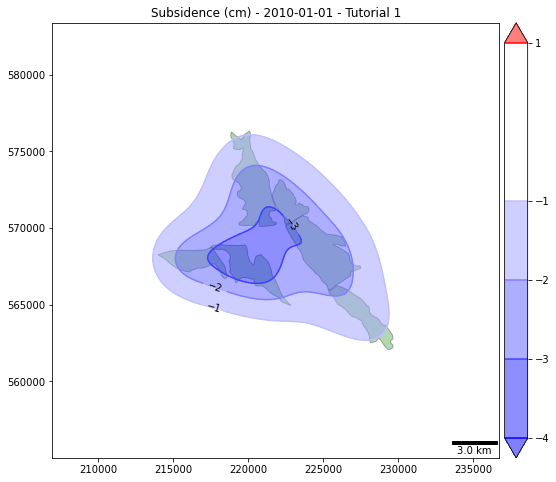

In [4]:
plot.plot_subsidence(Model,
                    service = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi',
                    layer = 'VIIRS_CityLights_2012',
                    epsg = 28992)

# Adjusting visuals
The PySub plotting functions pass arguments to matplotlib.pyplot functions to dictate the plotted result. The default arguments are stored in the Model object. If we want to see the default values we can go to the model object and check which defaults values are set for each type of function. 

In [ ]:
Model.contourf_defaults

The defaults can be set with:

In [ ]:
Model.set_contourf_defaults({'cmap': 'jet'})

The explanation on how to adjust the defaults and which are available can be found by passing the desired setting function to the help function:

In [ ]:
help(Model.set_contourf_defaults)

When setting the default kwargs for that function all the plotting functions that make filled contours will use these arguments. If you want a specific call to a function you can set the keyword arguments in the function as well:

In [ ]:
plot.plot_subsidence(Model, contourf_kwargs = {'cmap': 'gist_rainbow_r'})

The possible kwargs are visible in the help function for the plot function.

## Shapes
The reservoirs are shown in the figures as polygons (standard green). Caverns would be displayed as points. It is also possible to have grids shown as a colored surface. Each of these type of spatial representations of a reservoir or cavern are stored in a geometry object from PySub.

In this part, we are discussing the use of shapes in the PySub tool. It is not the aim of the PySub tool to make editable shapes. We recommend GIS software to make figures using poylgons, lines and points. PySub's tools for this are limited.

The shapes of the reservoirs can be removed from the final figure by setting the plot_reservoir_shapes argument to False:

In [ ]:
plot.plot_subsidence(Model, plot_reservoir_shapes = False)

Note that the contours are now plotted with the "jet" colormap as set above with the set_contourf function. 

## Highlighting a shape

The shapes can be highlighted by setting the specific color of a shape. There are 3 reservoirs that have polygons plotted for the gas reservoirs. For shapes that are a different type of geometry, these should be considered in the entry of the color arguments as raster_kwargs or scatter_kwargs.

In [7]:
yellow         = (1, 1, 0) # RGB, RGBA or as string: 'yellow'
green          = (0, 1, 0) # RGB, RGBA or as string:  'green'
gas_reservoirs = ['Norg', 'Allardsoog', 'Een']
colors         = [yellow,  green,        green]

for color, reservoir in zip(colors, gas_reservoirs): print(reservoir, color)

Norg (1, 1, 0)
Allardsoog (0, 1, 0)
Een (0, 1, 0)


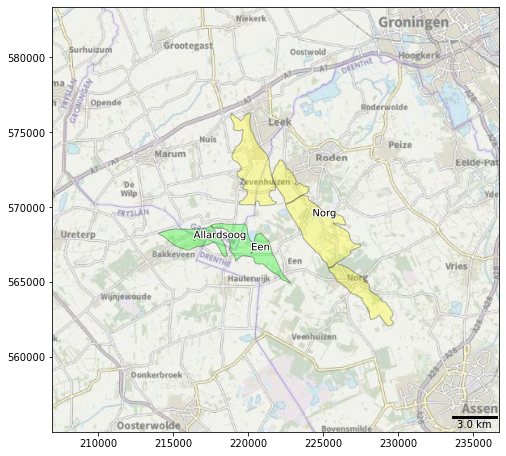

In [8]:
plot.plot_reservoirs(Model, shape_kwargs = {'fc': colors})

## Adding a different shape
The plot_subsidence function automatically uses the shapes that were used as input to the model. But maybe you want to compare it with another shape. For this, we can use the additional_shapes parameter of the plot subsidence function and the fetch method from the Geometries module. The fetch function takes the location or xy coordinates of a point or polygon as input.

Below, the shapes for the original input reservoirs are fetched, and an additional shape for Zevenhuizen-West. The original shapes used in the model are replaced with the additional files by setting the plot_reservoir_shapes to False. This way you can use different shapes for the reservoirs when plotting.

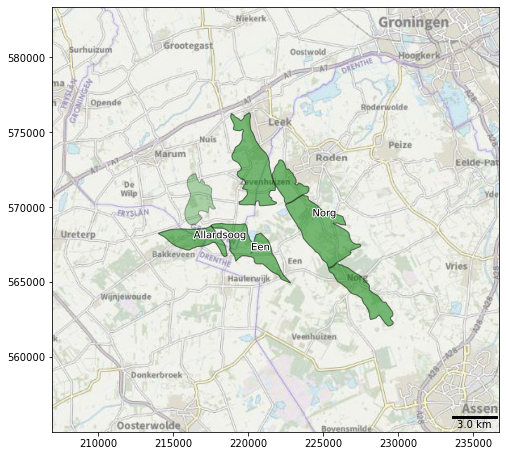

In [28]:
from PySub.Geometries import fetch

additional_shapes = fetch([
    r'Shapefiles/Norg.shp',
    r'Shapefiles/Allardsoog.shp',
    r'Shapefiles/Een.shp',
    r'Shapefiles/Zevenhuizen-West.shp',
])

plot.plot_reservoirs(Model, plot_reservoir_shapes = False, shape_kwargs = {}, additional_shapes = additional_shapes)

In [56]:
from pyproj import CRS
CRS.from_epsg(28992).to_wkt()

'PROJCRS["Amersfoort / RD New",BASEGEOGCRS["Amersfoort",DATUM["Amersfoort",ELLIPSOID["Bessel 1841",6377397.155,299.1528128,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4289]],CONVERSION["RD New",METHOD["Oblique Stereographic",ID["EPSG",9809]],PARAMETER["Latitude of natural origin",52.1561605555556,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",5.38763888888889,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9999079,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",155000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",463000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting (X)",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing (Y)",north,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["Engineering survey, topographic mapping."],AREA["Netherlands - onshore, including Waddenzee, Dutch Wad

Below figure has had some additional editing done:
Maybe that's a bit far out and we want to zoom in (a negative sign before the buffer parameter).
I want to add some additional information to this figure, not native to PySub! Like:
- a legend for the colors I have been using. We want it clear that the yellow field is the field that's going to be producing and the others have been producing already. Therefore, We want the labels to say yellow = Producing soon and green = Producing.
- labels for the x- and y-axis

We can retreive the figure for additional plotting by setting final to False. This returns a matplotlib fig and ax object, allowing for further manipulation of the figure:

In [ ]:
# Return a fig and ax object
fig, ax = plot.plot_reservoirs(
    Model, 
    shape_kwargs = {'fc': colors}, 
    final = False,
    buffer = -5000 # In m
)

# Set the axis labels
ax.set_xlabel('RD (m)')
ax.set_ylabel('RD (m)')

# We only want the color of the shapes to change between polygons so we copy the default values.
# For more info, use help(plot.add_custom_legend).
legend_kwargs = [Model.shape_defaults.copy() for c in (yellow, green)]
for i, c in enumerate((yellow, green)):
    legend_kwargs[i]['facecolor'] = c

# Make some good labels:
legend_labels = ['Producing soon', 'Producing',]
    
plot.add_custom_legend(ax, 'polygon', 
                       kwargs = legend_kwargs, 
                       labels = legend_labels)
fig.show()

# Displaying new data
By setting values to the SubsidenceModel object (that are xarray Datasets or DataArrays) we can display new data. When at least the data is available in the x- and y-dimension we can show it in 2D. In below cell, an example is made by setting a variable that is the difference between two instances in time:

In [ ]:
Model.subsidence_2000_2010 = Model.subsidence.sel(time = '1-1-2010') - Model.subsidence.sel(time = '1-1-2000')
plot.plot_subsidence(Model, variable = "subsidence_2000_2010", contour_steps = 0.001,
                    title = "Subsidence between 2000 and 2010 (cm)")

Note that the title has been changed by setting the title variable.